In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys
import os 
sys.path.append(os.path.abspath('../src'))

In [3]:
from ab_testing import ABanalysis

In [4]:
df= pd.read_csv("C:\\Users\\Aman\\Desktop\\kifyaw3\\storage\\MachineLearningRating_v3.csv", delimiter="|")


C:\Users\Aman\AppData\Local\Temp\ipykernel_12712\1769431211.py:1: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("C:\\Users\\Aman\\Desktop\\kifyaw3\\storage\\MachineLearningRating_v3.csv", delimiter="|")


In [7]:
def groupby_premium_and_claims_sum(df,column):
  aggrigated_data= df.groupby(column).agg({
      'TotalPremium': 'sum',
      'TotalClaims': 'sum'
  }).reset_index()
  aggrigated_data['ClaimsToPremiumRatio'] = aggrigated_data['TotalClaims'] / aggrigated_data['TotalPremium']+1
  return aggrigated_data




gender_agg = groupby_premium_and_claims_sum(df,"Gender")
province_agg = groupby_premium_and_claims_sum(df,'Province')


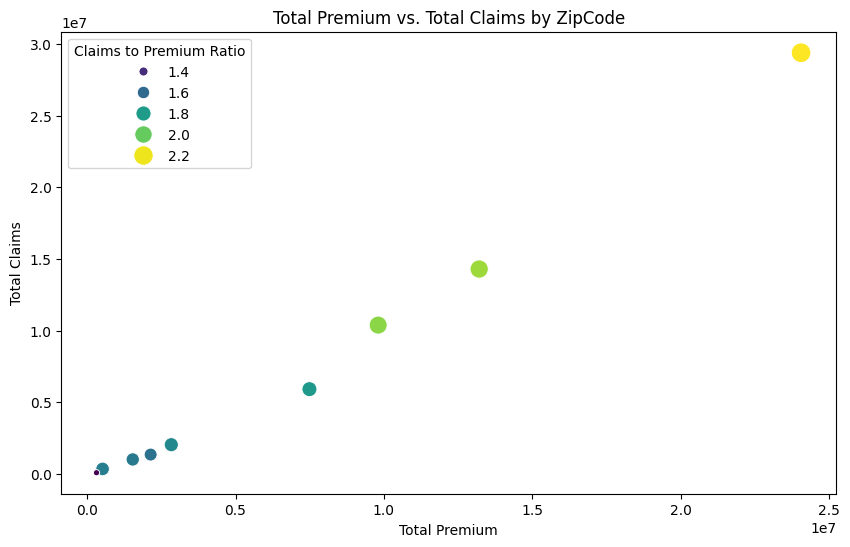

In [8]:
# Plot: Claims vs. Premiums by ZipCode
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=province_agg,
    x='TotalPremium',
    y='TotalClaims',
    hue='ClaimsToPremiumRatio',
    palette='viridis',
    size='ClaimsToPremiumRatio',
    sizes=(20, 200)
)
plt.title('Total Premium vs. Total Claims by ZipCode')
plt.xlabel('Total Premium')
plt.ylabel('Total Claims')
plt.legend(title='Claims to Premium Ratio')
plt.show()

C:\Users\Aman\AppData\Local\Temp\ipykernel_6068\2797357386.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


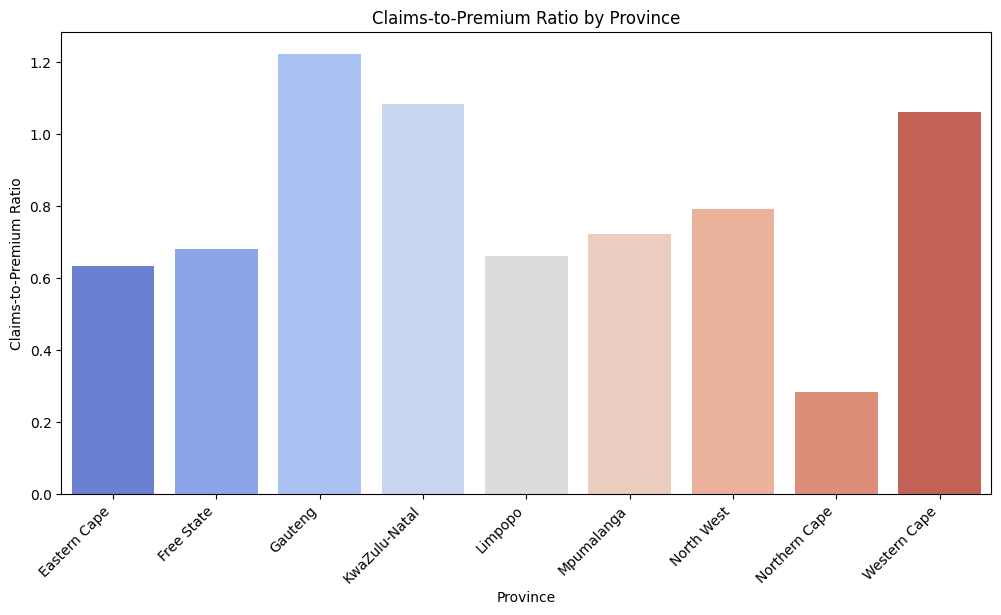

In [8]:
# Plot: Boxplot to show Claims-to-Premium Ratio distribution by Province
plt.figure(figsize=(12, 6))
sns.barplot(
    data=province_agg,
    x='Province',
    y='ClaimsToPremiumRatio',
    palette='coolwarm'
)
plt.title('Claims-to-Premium Ratio by Province')
plt.xlabel('Province')
plt.ylabel('Claims-to-Premium Ratio')
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\Aman\AppData\Local\Temp\ipykernel_6068\3994508851.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


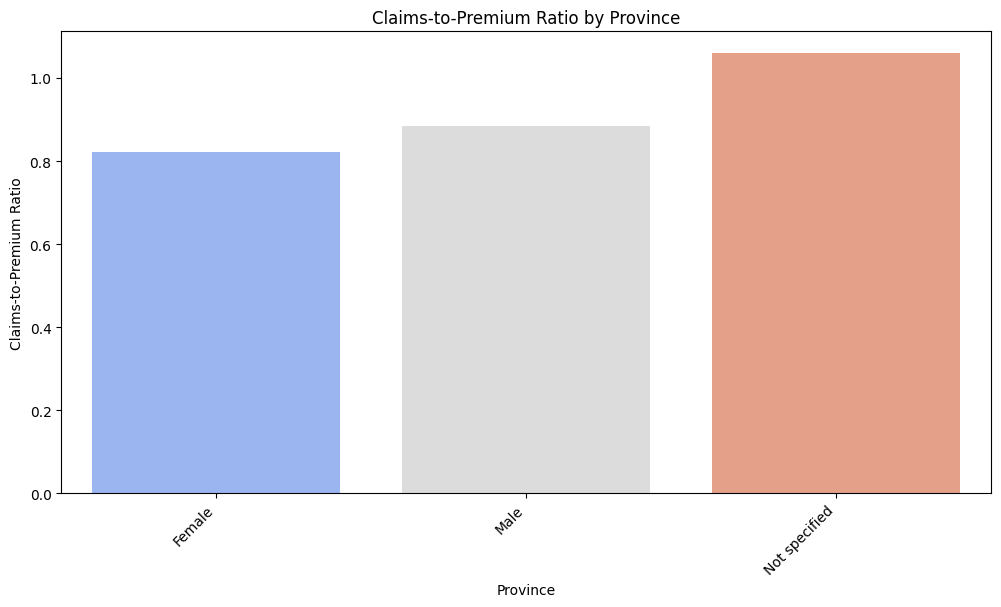

In [9]:
# Plot: Boxplot to show Claims-to-Premium Ratio distribution by Province
plt.figure(figsize=(12, 6))
sns.barplot(
    data=gender_agg,
    x='Gender',
    y='ClaimsToPremiumRatio',
    palette='coolwarm'
)
plt.title('Claims-to-Premium Ratio by Province')
plt.xlabel('Province')
plt.ylabel('Claims-to-Premium Ratio')
plt.xticks(rotation=45, ha='right')
plt.show()

In [18]:
def descriptive_statistics(df):
        """Generate descriptive statistics grouped by province and gender."""
        return df.groupby(['Province', 'Gender']).agg(
            TotalClaims=('TotalClaims', 'mean'),
            Premium=('TotalPremium', 'mean'),
            Count=('TotalClaims', 'size')
        ).reset_index()
df_new = descriptive_statistics(df)


In [19]:
df_new

,Province,Gender,TotalClaims,Premium,Count
0,Eastern Cape,Not specified,44.713432,70.546672,30336
1,Free State,Not specified,43.822975,64.373780,8099
2,Gauteng,Female,65.551216,52.855719,1206
3,Gauteng,Male,72.219972,46.669954,14230
4,Gauteng,Not specified,74.957734,60.713586,370621
5,KwaZulu-Natal,Female,51.657776,109.269218,1083
6,KwaZulu-Natal,Male,14.690509,34.019854,5632
7,KwaZulu-Natal,Not specified,87.782792,79.951043,161338
8,Limpopo,Male,17.408424,46.718499,1938
9,Limpopo,Not specified,42.918123,63.183861,22898


In [20]:
analysis = ABanalysis(df_new)


In [21]:
risk_across_provinces = analysis.test_risk_across_provinces()
risk_across_provinces

{'Test': 'ANOVA',
 'Null Hypothesis': 'No risk differences across provinces',
 'F-Statistic': np.float64(2.0426653517436666),
 'p-Value': np.float64(0.12777505950004622),
 'Reject Null': np.False_}

In [22]:
risk_accross_gender = analysis.test_risk_difference_gender()
risk_accross_gender

{'Test': 'T-Test',
 'Null Hypothesis': 'No significant risk differences between women and men',
 'T-Statistic': np.float64(-0.4722341386343878),
 'p-Value': np.float64(0.6470547404012507),
 'Reject Null': np.False_}